In [45]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_labels = pd.read_csv( 'train_labels.csv', index_col='building_id')

In [47]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

## Explore the Dataset

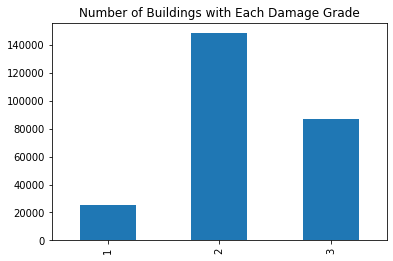

In [48]:
(train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

We can see that there is a bit of a class imbalance. With far more values falling into the 2 category than 3 or especially 1. 

In [49]:
train_values.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

This dataset shows that we do not have to deal with any missing values within our matrix 

In [50]:
len(train_values)==len(train_labels)

True

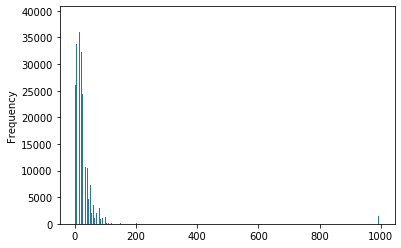

In [51]:
train_values['age'].plot.hist(bins = 350)

In [52]:
train_values['age_bin'] = pd.cut(train_values['age'], bins=[-1,5,10,25,50,60,150], labels=["BrandNew", "New", "Recent","eh","Fair","Old"])



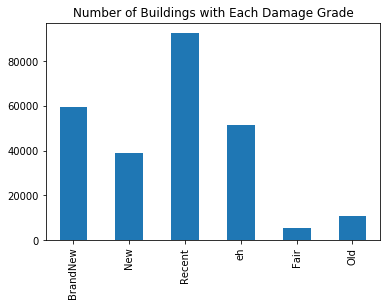

In [53]:
(train_values.age_bin
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

In [54]:
#Capping the outlier rows with Percentiles
upper_lim = train_values['age'].quantile(.99)
lower_lim = train_values['age'].quantile(.05)

In [55]:
upper_lim

100.0

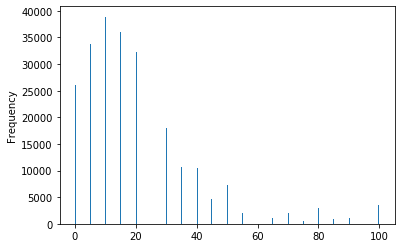

In [56]:
train_values.loc[(train_values['age'] > upper_lim),'age'] = upper_lim
train_values['age'].plot.hist(bins = 350)

ValueError: Colormap damage_grade is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

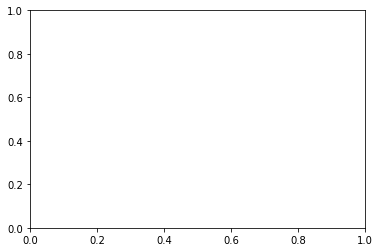

In [57]:
frames = [train_values,train_labels]
new_plot = pd.concat(frames)
#new_plot.damage_grade = train_labels.damage_grade
new_plot['count_families'].plot.hist(bins = 6,colormap='damage_grade')

In [ ]:
train_values.count_families.median()

In [ ]:
#Capping the outlier rows with Percentiles
upper_lim = train_values['count_families'].quantile(.99)


In [ ]:
train_values['count_floors_pre_eq'].plot.hist(bins = )

In [ ]:
train_values.count_floors_pre_eq.max()

## Pre-processing the data

Before dealing with the categorical variables, I am going to normalize the 

## Categorical Label Encoding

All categorical labels values were obfuscated lowercase ASCII characters. So, I am assuming that they are nominal categorical values and will be encoded that way. It was also mentioned that each column was randomly assigned, so the value does not influence values from other columns so I am comfortable making this assumption for encoding. 

In [ ]:
nominal_categorical_values = {'land_surface_condition', 'foundation_type','roof_type','ground_floor_type',
                             'other_floor_type','position','plan_configuration','legal_ownership_status'}


In [ ]:
def target_encoder(df, column, target, method='mean'):
    

    if method == 'mean':
        encoded_column = df[column].map(df.groupby(column)[target].mean())
    elif method == 'median':
        encoded_column = df[column].map(df.groupby(column)[target].median())
    elif method == 'std':
        encoded_column = df[column].map(df.groupby(column)[target].std())
    else:
        raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

    return encoded_column

In [58]:
train_values['roof_type'].map(train_values.groupby('roof_type')['label'].median())

KeyError: 'Column not found: label'

In [59]:
train_values.groupby('roof_type')['label'].mean()

KeyError: 'Column not found: label'

In [ ]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()

train_values['label'] = train_labels

for feature in nominal_categorical_values:
    #train_values[feature] = gle.fit_transform(train_values[feature])
    train_values[feature] = target_encoder(train_values,feature,'label')
    

In [ ]:
train_values.head()

In [70]:
train_values.drop(columns = ['label'])

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,age_bin
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30.0,6,5,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,0,eh
28830,8,900,2812,2,10.0,8,7,2.289081,2.329573,2.269637,...,0,0,0,0,0,0,0,0,0,New
94947,21,363,8973,2,10.0,5,5,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,0,New
590882,22,418,10694,2,10.0,6,5,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,0,New
201944,11,131,1488,3,30.0,8,9,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,0,eh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55.0,6,3,2.251407,2.329573,2.269637,...,0,0,0,0,0,0,0,0,0,Fair
669485,17,715,2060,2,0.0,6,5,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,0,BrandNew
602512,17,51,8163,3,55.0,6,7,2.234170,2.329573,2.320173,...,0,0,0,0,0,0,0,0,0,Fair


In [69]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,age_bin,label
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30.0,6,5,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,eh,3
28830,8,900,2812,2,10.0,8,7,2.289081,2.329573,2.269637,...,0,0,0,0,0,0,0,0,New,2
94947,21,363,8973,2,10.0,5,5,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,New,3
590882,22,418,10694,2,10.0,6,5,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,New,2
201944,11,131,1488,3,30.0,8,9,2.234170,2.329573,2.269637,...,0,0,0,0,0,0,0,0,eh,3


KeyboardInterrupt: 

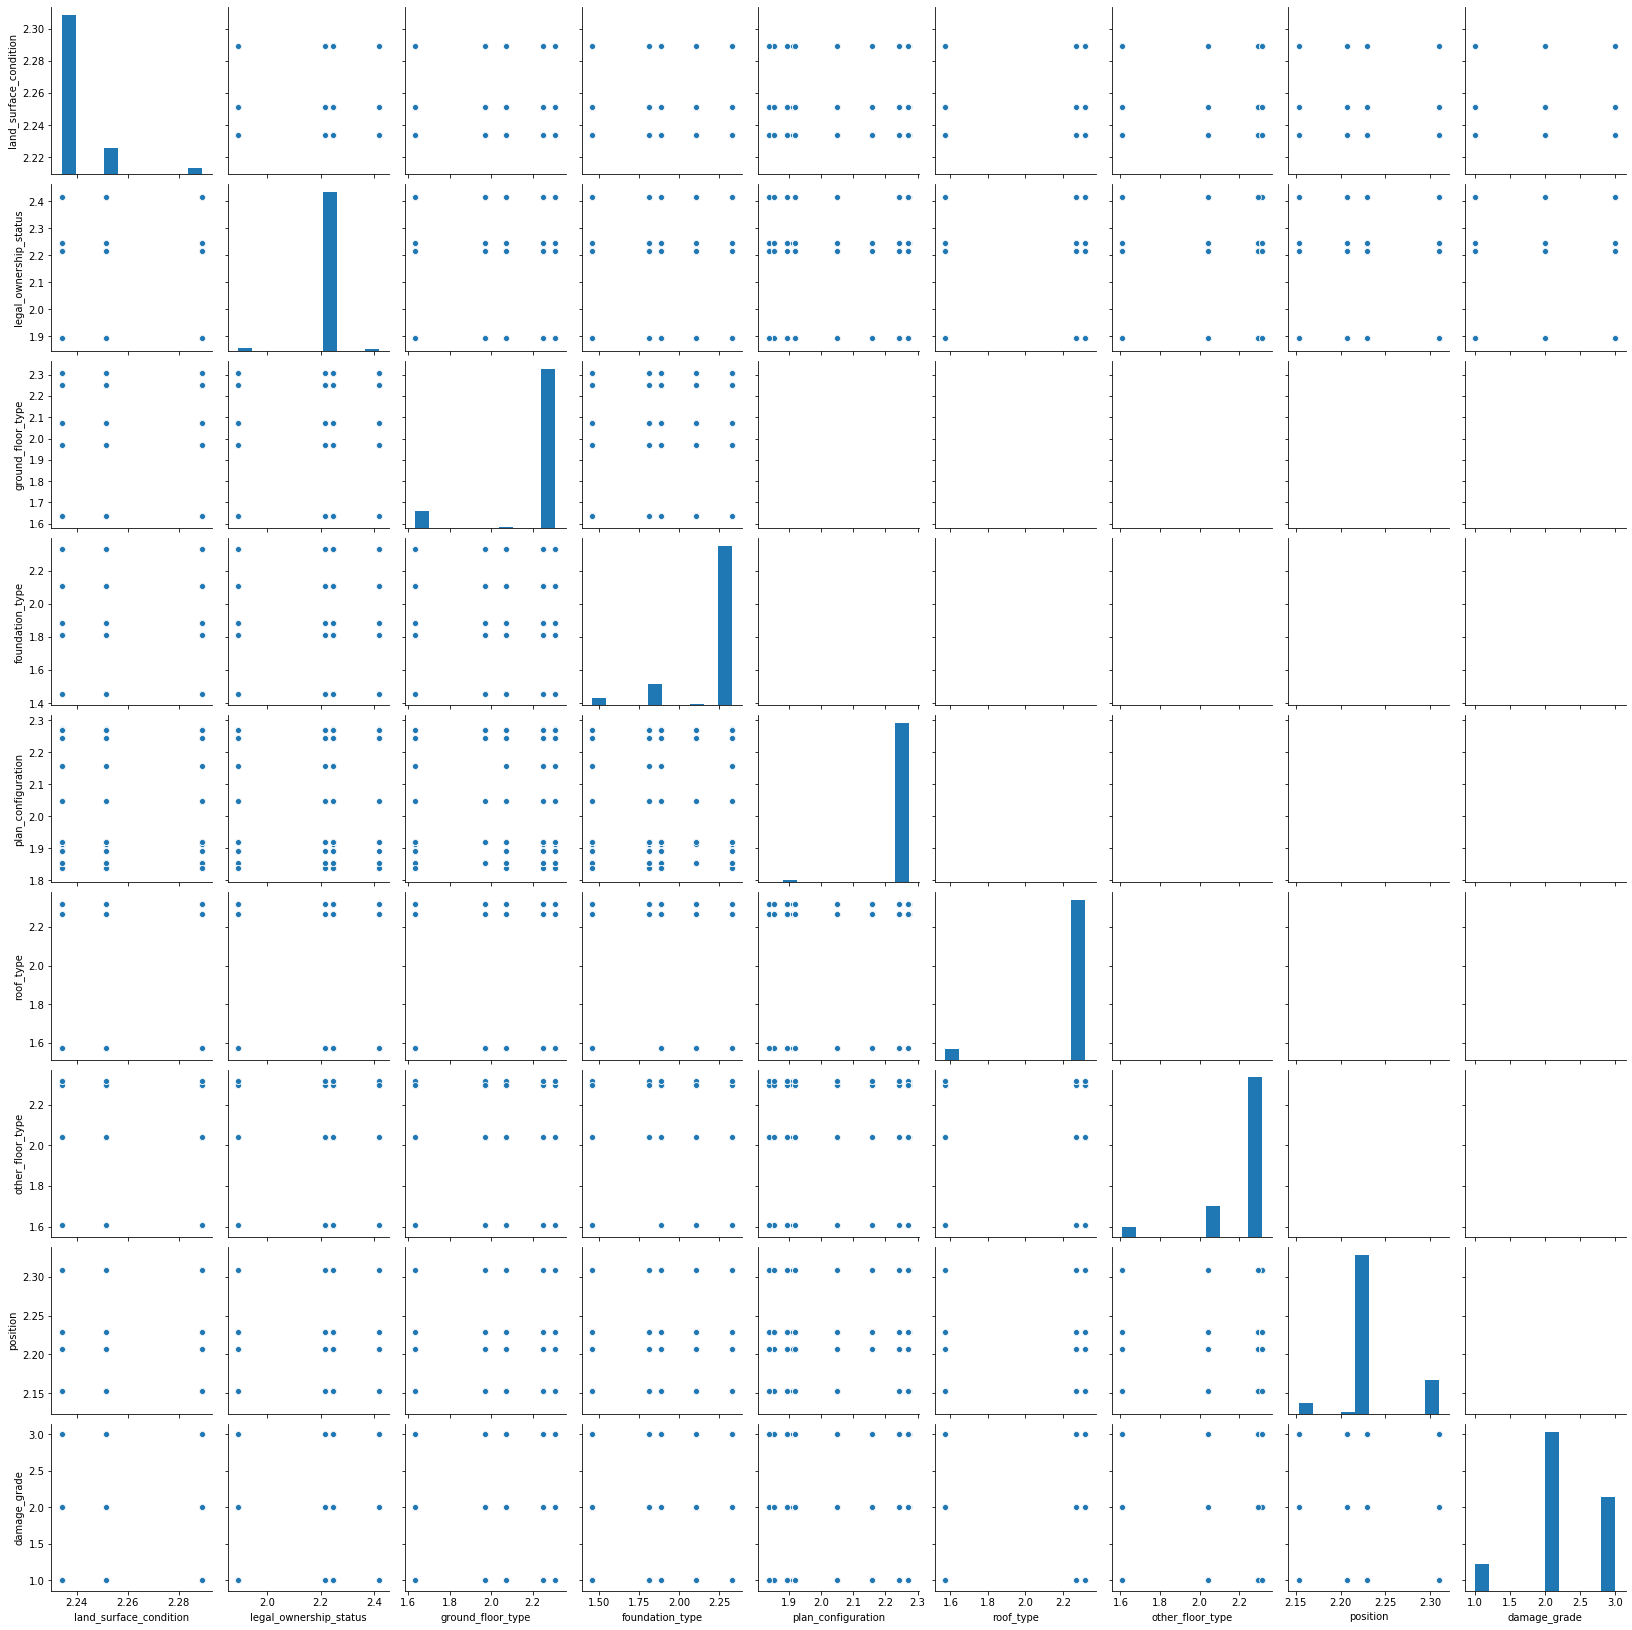

In [63]:
train_values_subset = train_values[nominal_categorical_values]

sns.pairplot(train_values_subset.join(train_labels))

## Secondary Use

In [ ]:
(train_values.has_secondary_use_health_post
             .value_counts()
             .sort_index()
             .plot.bar(title="Secondary Use Health Post"))

In [ ]:
(train_values.has_secondary_use_use_police
             .value_counts()
             .sort_index()
             .plot.bar(title="Secondary Use Police Post"))

In [ ]:
(train_values.has_secondary_use
             .value_counts()
             .sort_index()
             .plot.bar(title="Secondary Use"))

In [ ]:
(train_values.has_secondary_use_hotel
             .value_counts()
             .sort_index()
             .plot.bar(title="Secondary Use Hotel"))

In [ ]:
(train_values.has_secondary_use_agriculture
             .value_counts()
             .sort_index()
             .plot.bar(title="Secondary Use Hotel"))

In [ ]:
(train_values.has_secondary_use_rental
             .value_counts()
             .sort_index()
             .plot.bar(title="Secondary Use Hotel"))